# Building a Neural Network

## Introduction:

This project will cover what neural networks are and its implementation in Python for the tass of basic recognition. This project will also explore the domain of computer vision and how it is an automation of extracting information from digital images. There are a lot of applications for computer vision such as control systems to be used in industry, facial filters in mobile apps, or security surveillance systems.

Computer vision can also be broken down into the following:
- Content recognition (Object Identification, Object detection and localisation, Object and instance segmentation or Pose estimation).
- Video analysis (Instance Tracking, Action recognition, Motion estimation).
- Content-Aware image edition.
- Scene Reconstruction.

## Breakdown of this Notebook:
- Building an ANN from scratch
- Calling network from .py File

## 1.1 - Background on the Dataset: MNIST Digits.

The dataset can be obtain from the link: http://yann.lecun.com/exdb/mnist/

The MNIST Digits dataset contains 70,000 greyscale images that have 28 x 28 pixels for each of the image. This dataset has been a reference set over the last few years to test and improve methods for this recognition task. The Input vector for the network works out to be 28 x 28 = 784 values and it has an output of 10 values (where there are 10 different digits ranging from 0 to 9). Further, the number of hidden layers for this network will be up to the modeller. 

## 1.2 - Loading in the Dataset:

The data can also be directly loaded in by using the the "minst" Python module. To install -> https://pypi.org/project/mnist/ or "pip install mnist" 
The data should be prepared by splitting into two sets that are the training aand testing sets.

In [1]:
# Import the required Libraries:
import numpy as np
import mnist

seed_nb = 42

np.random.seed(seed_nb)

In [2]:
# Load in the Training dataset:
X_train, y_train = mnist.train_images(), mnist.train_labels()

# Load in the Testing dataset:
X_test, y_test = mnist.test_images(), mnist.test_labels()

# Set the Number of Classes:
nb_classes = 10

In [3]:
# Inspect:
X_train.shape

(60000, 28, 28)

In [4]:
# Inspect:
X_test.shape

(10000, 28, 28)

In [5]:
# Inspect:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## 2 - Visualise the data:

Here, the "matplotlib" library will be used to visualise an image from the data.

In [6]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

The image index taken is: 7270


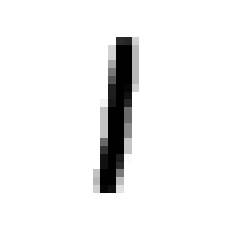

In [7]:
# Grab the image, by index:
img_idx = np.random.randint(low = 0, high = X_test.shape[0])
print('The image index taken is: ' + str(img_idx))

# Plot:
plt.imshow(X_test[img_idx], cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()

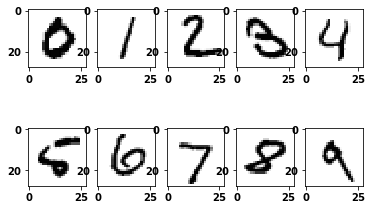

In [8]:
# Plot 10 of the Digits:
fig = plt.figure()

for i in range(10):
    img_idx = np.argwhere(y_test == i)[0]
    plottable_image = np.reshape(X_test[img_idx], (28, 28))
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(plottable_image, cmap = matplotlib.cm.binary)

## 3 - Dataset Preprocessing:

Transform the images into the required column vectors to be used as the input for the Neural Network.

In [9]:
# Flatten the data into a single row of vectors:
X_train, X_test = X_train.reshape(-1, 28 * 28), X_test.reshape(-1, 28 * 28)

# Check out the Pixel Values:
print("Pixel values between {} and {}".format(X_train.min(), X_train.max()))

Pixel values between 0 and 255


In [10]:
# Normalise the input data: scaling it between 0 and 1.
X_train, X_test = X_train / 255., X_test / 255.
print("Normalized pixel values between {} and {}".format(X_train.min(), X_train.max()))

# Inspect:
X_train.shape

Normalized pixel values between 0.0 and 1.0


(60000, 784)

In [11]:
# One-hot encode the labels:
y_train = np.eye(nb_classes)[y_train]

# Inpsect:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

## 4 - Summary of the Training process:

1. Select "n" amount of training images at a time (out of the whole training set) and input them to the network.
2. Compute and backpropagate the loss. This is done by using chain rule to obtain the derivatives w.r.t the parameters of the layers.
3. Update the parameters with the corresponding derivative(s) values that is scaled according to the learning rate.
4. Repeat the steps 1 to 3 for the whole training set. Meaning the training is done in batches.
5. Repeat the steps 1 to 4 until the network converges to a solution, or set a limited number of iterations (epochs).

In [12]:
# Import the Classes from the "NeuralNetwork_Utilities.py" file:
from NeuralNetwork_Utilities import *

## 4.1 - Traing the Simple Network model on the dataset:

Here, the SimpleNetwork will be instantiated as a network with 2 hidden layers. It will take an input of flattened images and ouput a 10 value vector that represents the prediction of which image belonging to each of the class. The higher the ouptut value, means that the stronger the network believes that the image belongs to that certain class.

In [13]:
# Instantiating the Network:
mnist_classifier = SimpleNetwork(num_inputs = X_train.shape[1],
                                 num_outputs = nb_classes,
                                 hidden_layers_sizes = [64, 32])

## 4.2 - Get a Baseline of the Un-trained model performance:

Performance of the network can be found by calculating the loss over the training set and the accuracy reached over the test set.

In [14]:
# Get the predictions the model made from the training set:
predictions = mnist_classifier.forward(x = X_train)

# Compute the loss of the un-trained model:
loss_untrained = mnist_classifier.loss_func(pred = predictions,
                                            target = y_train)

# Compute the accuracy of the un-trained model:
acc_untrained = mnist_classifier.evaluate_accuracy(X_val = X_test, 
                                                   y_val = y_test)

# Print:
print("Untrained model performs with: training loss = {:.6f} | val accuracy = {:.2f}%".format(
    loss_untrained, acc_untrained * 100))

Untrained model performs with: training loss = 4.436700 | val accuracy = 12.19%


### 4.3 - Train the model and Validate it:

In [15]:
import timeit

In [16]:
# running time calculation
start = timeit.default_timer()

In [17]:
losses, accuracies = mnist_classifier.train(X_train = X_train, 
                                            y_train = y_train, 
                                            X_val = X_test, 
                                            y_val = y_test, 
                                            batch_size = 32, 
                                            nb_epochs = 500, 
                                            learning_rate = 0.001, 
                                            print_frequency = 20)

Epoch    0: training loss = 1.097069 | val accuracy = 19.10%
Epoch   20: training loss = 0.252957 | val accuracy = 84.89%
Epoch   40: training loss = 0.177532 | val accuracy = 88.92%
Epoch   60: training loss = 0.146596 | val accuracy = 90.49%
Epoch   80: training loss = 0.128074 | val accuracy = 91.28%
Epoch  100: training loss = 0.114770 | val accuracy = 92.01%
Epoch  120: training loss = 0.104587 | val accuracy = 92.40%
Epoch  140: training loss = 0.096668 | val accuracy = 92.76%
Epoch  160: training loss = 0.090181 | val accuracy = 93.06%
Epoch  180: training loss = 0.084636 | val accuracy = 93.21%
Epoch  200: training loss = 0.079825 | val accuracy = 93.46%
Epoch  220: training loss = 0.075630 | val accuracy = 93.66%
Epoch  240: training loss = 0.071947 | val accuracy = 93.72%
Epoch  260: training loss = 0.068686 | val accuracy = 93.94%
Epoch  280: training loss = 0.065801 | val accuracy = 94.12%
Epoch  300: training loss = 0.063199 | val accuracy = 94.27%
Epoch  320: training los

In [18]:
# running time check:
stop = timeit.default_timer()
print('Time: {} minutes'.format(round(stop - start, 2)/60))

Time: 9.463166666666666 minutes


In [19]:
max_acc = accuracies[np.argmax(accuracies)]
print("The highest accuracy score found was: {}%".format(round(max_acc, 4) * 100))

The highest accuracy score found was: 94.8%


### Observation:

The training completed relatively quickly as it is only running on the CPU. The highest accuracy achieved was 94.76% and this represents excellent performance.

## 4.4 - Plot the Lossess and Accuracies over the training epochs:

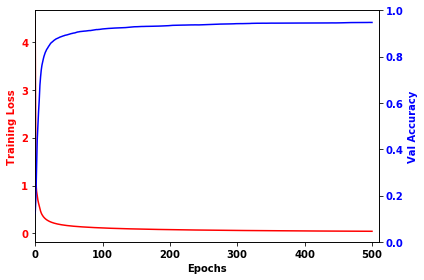

In [20]:
losses, accuracies = [loss_untrained] + losses, [acc_untrained] + accuracies
fig, ax_loss = plt.subplots()

# Instantiate the FIRST axes:
color = 'red'
ax_loss.set_xlim([0, 510])
ax_loss.set_xlabel('Epochs')
ax_loss.set_ylabel('Training Loss', color=color)
ax_loss.plot(losses, color=color)
ax_loss.tick_params(axis='y', labelcolor=color)

# Instantiate a SECOND axes that shares the same x-axis
ax_acc = ax_loss.twinx()  
color = 'blue'
ax_acc.set_xlim([0, 510])
ax_acc.set_ylim([0, 1])
ax_acc.set_ylabel('Val Accuracy', color=color)
ax_acc.plot(accuracies, color=color)
ax_acc.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

### Observation:

The network's convergence is very quick and proceeded to increase its accuracy at a slower pace until reaching the end of 500 epochs of training. Judging from the curve of the line, it can be seen that a more accurate model can be obtained by increasing the number of training epochs. 

## 4.5 - Longer training times:

Let's find out if a higher accuracy can be reached by increasing the number of epochs. The new model will be called "mnist_classifier_LTT" where LTT stands for Longer Training Times. The number of epochs will be set to 1,000.

In [21]:
# Instantiating the Network:
mnist_classifier_LTT = SimpleNetwork(num_inputs = X_train.shape[1],
                                 num_outputs = nb_classes,
                                 hidden_layers_sizes = [64, 32])

In [22]:
# running time calculation
start = timeit.default_timer()

In [23]:
losses, accuracies = mnist_classifier_LTT.train(X_train = X_train, 
                                            y_train = y_train, 
                                            X_val = X_test, 
                                            y_val = y_test, 
                                            batch_size = 32, 
                                            nb_epochs = 1000, 
                                            learning_rate = 0.001, 
                                            print_frequency = 20)

Epoch    0: training loss = 1.140538 | val accuracy = 31.13%
Epoch   20: training loss = 0.237928 | val accuracy = 85.37%
Epoch   40: training loss = 0.172657 | val accuracy = 88.90%
Epoch   60: training loss = 0.143387 | val accuracy = 90.41%
Epoch   80: training loss = 0.125376 | val accuracy = 91.26%
Epoch  100: training loss = 0.112804 | val accuracy = 91.81%
Epoch  120: training loss = 0.103321 | val accuracy = 92.27%
Epoch  140: training loss = 0.095931 | val accuracy = 92.79%
Epoch  160: training loss = 0.089873 | val accuracy = 93.03%
Epoch  180: training loss = 0.084708 | val accuracy = 93.28%
Epoch  200: training loss = 0.080205 | val accuracy = 93.47%
Epoch  220: training loss = 0.076245 | val accuracy = 93.60%
Epoch  240: training loss = 0.072734 | val accuracy = 93.70%
Epoch  260: training loss = 0.069607 | val accuracy = 93.87%
Epoch  280: training loss = 0.066776 | val accuracy = 93.94%
Epoch  300: training loss = 0.064199 | val accuracy = 94.03%
Epoch  320: training los

In [24]:
# running time check:
stop = timeit.default_timer()
print('Time: {} minutes'.format(round(stop - start, 2)/60))

Time: 18.85983333333333 minutes


In [25]:
max_acc = accuracies[np.argmax(accuracies)]
print("The highest accuracy score found was: {}%".format(round(max_acc, 4) * 100))

The highest accuracy score found was: 95.02000000000001%


### Observation:

## 4.6 - Increasing the number of hidden layers:

Here, the number of hidden layers will be reconfigured to [128, 64, 32]. The new model will be called "mnist_classifier_MHL" where MHL stands for More Hidden Layers.

In [26]:
# Instantiating the Network:
mnist_classifier_MHL = SimpleNetwork(num_inputs = X_train.shape[1],
                                 num_outputs = nb_classes,
                                 hidden_layers_sizes = [128, 64, 32])

In [27]:
# running time calculation
start = timeit.default_timer()

In [28]:
losses, accuracies = mnist_classifier_MHL.train(X_train = X_train, 
                                            y_train = y_train, 
                                            X_val = X_test, 
                                            y_val = y_test, 
                                            batch_size = 32, 
                                            nb_epochs = 500, 
                                            learning_rate = 0.001, 
                                            print_frequency = 20)

Epoch    0: training loss = 0.923148 | val accuracy = 25.81%
Epoch   20: training loss = 0.315040 | val accuracy = 78.51%
Epoch   40: training loss = 0.174521 | val accuracy = 89.29%
Epoch   60: training loss = 0.130832 | val accuracy = 91.33%
Epoch   80: training loss = 0.109665 | val accuracy = 92.39%
Epoch  100: training loss = 0.095735 | val accuracy = 92.89%
Epoch  120: training loss = 0.085585 | val accuracy = 93.31%
Epoch  140: training loss = 0.077788 | val accuracy = 93.58%
Epoch  160: training loss = 0.071434 | val accuracy = 93.72%
Epoch  180: training loss = 0.066097 | val accuracy = 93.91%
Epoch  200: training loss = 0.061558 | val accuracy = 93.94%
Epoch  220: training loss = 0.057687 | val accuracy = 94.10%
Epoch  240: training loss = 0.054337 | val accuracy = 94.15%
Epoch  260: training loss = 0.051382 | val accuracy = 94.19%
Epoch  280: training loss = 0.048716 | val accuracy = 94.22%
Epoch  300: training loss = 0.046286 | val accuracy = 94.29%
Epoch  320: training los

In [29]:
# running time check
stop = timeit.default_timer()
print('Time: {} minutes'.format(round(stop - start, 2)/60))

Time: 16.95116666666667 minutes


In [30]:
max_acc = accuracies[np.argmax(accuracies)]
print("The highest accuracy score found was: {}%".format(round(max_acc, 4) * 100))

The highest accuracy score found was: 94.55%


### Observation:

Here, the model was experimented with more hidden layers. The idea was to have more nodes to capture the features of the dataset, but it would seem like more hidden layers and nodes does not increase the accuracy of the mode.

Further testing can be conducted by listing out the hyperparameters (layer sizes, learning rate, batch sizes and activation functions) and run the model through them. The model with the greatest score would be chosen. Other thoughts and considerations would be the amount of compute time that would be required if the model complexity increases. In these cases, it would be better to utilise a simpler model if the increases in model performance is not great enough to justify the model complexity. 

## 5 - Summary:

This project ventures into building a neural network from scratch and I am able to appreciate its framework and how it works. I was able to learn and further develop my current understanding in neural networks, where more specifically, the Object oriented programming side of the network itself. Further explorations can consist of experimenting with the hyperparameters, like layer sizes, learning rate, batch sizes and activation functions, to tune the model to perfrom much better. 